In [27]:
# imports
import json
import matplotlib.pyplot as plt
import numpy as np
import os

In [34]:
# define experiment constants

# results are saved in this directory
ROOT_DIR = "tmp/"
# the name of the experiment
EXPERIMENT_NAME = "test"
# path to the (pretraining) dataset of the model
DATASET_DIR = "./datasets"
# file name of the tokenized version of the dataset
DATASET_FILE = "train_dataset.npy"
# number of trials to run in the experiment
NUM_TRIALS = 10
# language of the setup
LANGUAGE = "en"
# split of the dataset to use
SPLIT = "train"

# sequence parameters
SUFFIX_LEN = 50
PREFIX_LEN = 50
EXAMPLE_TOKEN_LEN = 200
PREPREFIX_LEN = 100

In [35]:
# create config.json from constants
config = {
    "root_dir": ROOT_DIR,
    "experiment_name": EXPERIMENT_NAME,
    "dataset_dir": DATASET_DIR,
    "dataset_file": DATASET_FILE,
    "num_trials": NUM_TRIALS,
    "language": LANGUAGE,
    "split": SPLIT,
    "suffix_len": SUFFIX_LEN,
    "prefix_len": PREFIX_LEN,
    "example_token_len": EXAMPLE_TOKEN_LEN,
    "preprefix_len": PREPREFIX_LEN
}

with open("config.json", "w") as f:
    json.dump(config, f, indent=4)

In [ ]:
# 1. Split the examples into two parts: prefix and suffix (and preprefix)

# assumption: data is prepared in jsonlines format with desired token length
!python split_dataset.py --config_file config.json

In [ ]:
# 2. Generate model output using prefixes as prompts

# will not overwrite results

!python extraction.py --config_file config.json

In [36]:
# 3. Evaluate the model output against the dataset
!python evaluation.py --config_file config.json

2024-05-25 20:16:30,728 - INFO
===== Starting evaluation of similarity between generated and original text in language en for 50 prefix & suffix length =====
2024-05-25 20:16:30,731 - INFO
Starting BLEU-score evaluation for trial 0
2024-05-25 20:16:30,883 - INFO
Finished BLEU-score evaluation for trial 0
2024-05-25 20:16:30,884 - INFO
Starting BLEU-score evaluation for trial 1
2024-05-25 20:16:31,035 - INFO
Finished BLEU-score evaluation for trial 1
2024-05-25 20:16:31,035 - INFO
Starting BLEU-score evaluation for trial 2
2024-05-25 20:16:31,184 - INFO
Finished BLEU-score evaluation for trial 2
2024-05-25 20:16:31,184 - INFO
Starting BLEU-score evaluation for trial 3
2024-05-25 20:16:31,357 - INFO
Finished BLEU-score evaluation for trial 3
2024-05-25 20:16:31,357 - INFO
Starting BLEU-score evaluation for trial 4
2024-05-25 20:16:31,509 - INFO
Finished BLEU-score evaluation for trial 4
2024-05-25 20:16:31,509 - INFO
Starting BLEU-score evaluation for trial 5
2024-05-25 20:16:31,658 - IN

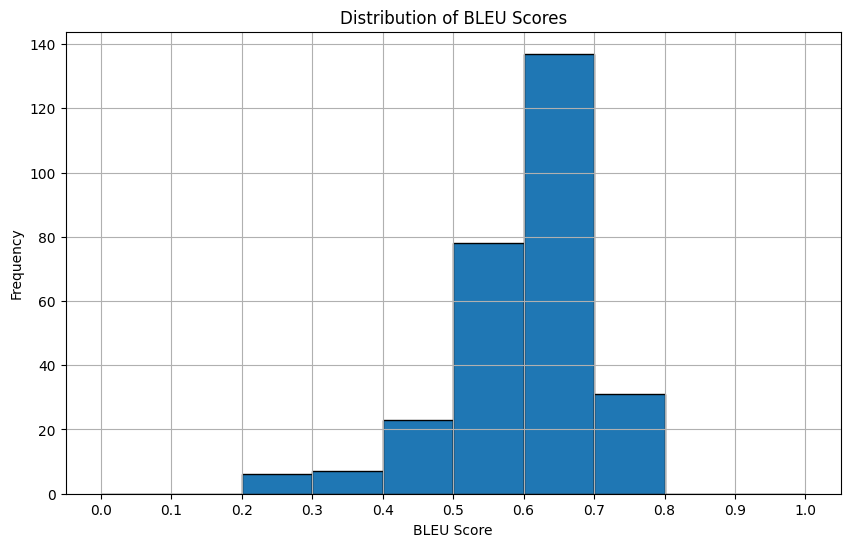

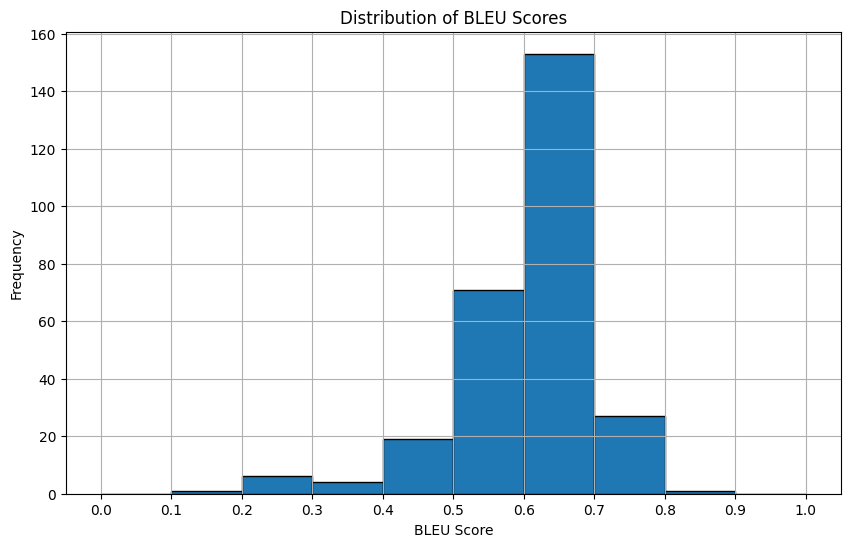

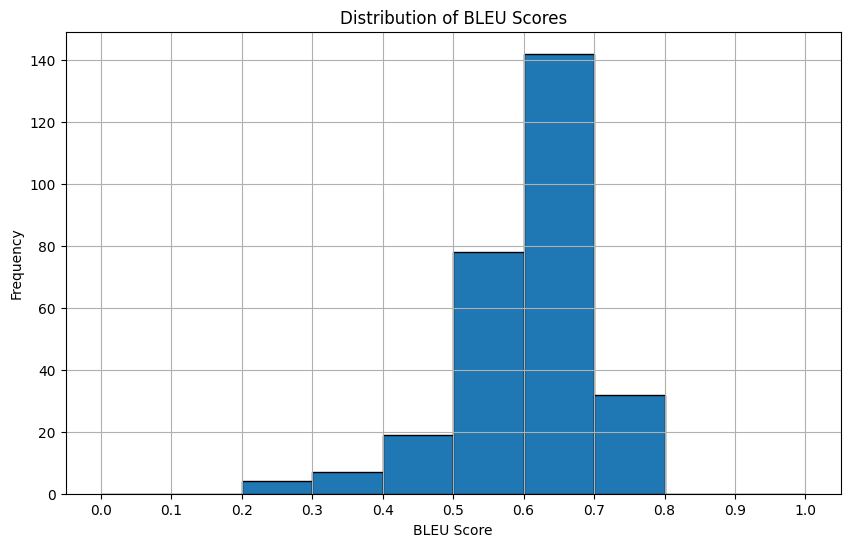

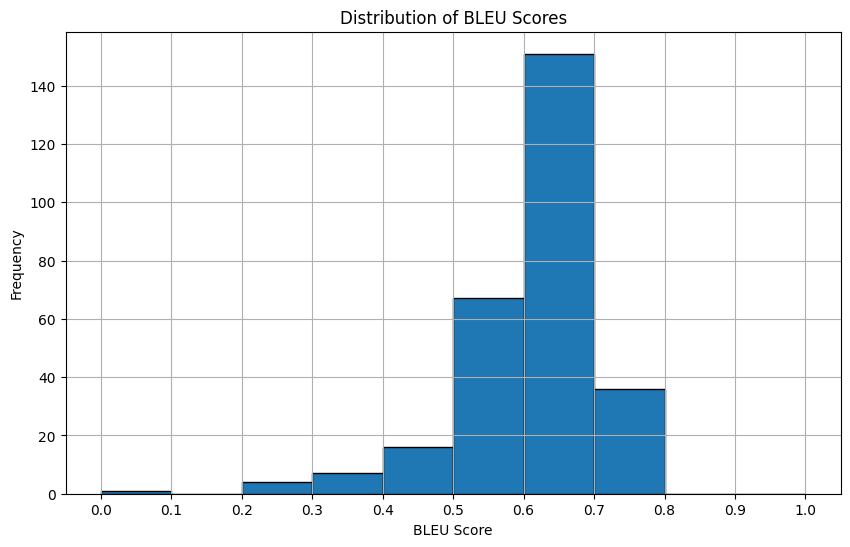

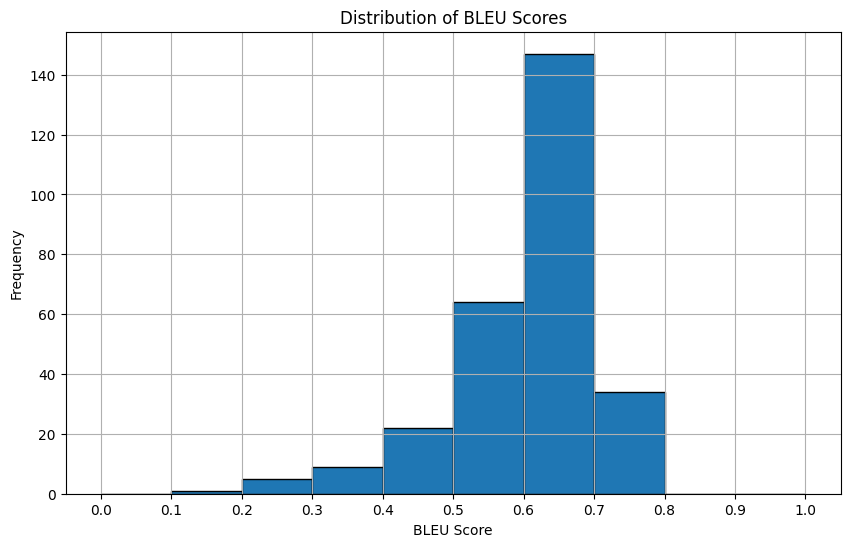

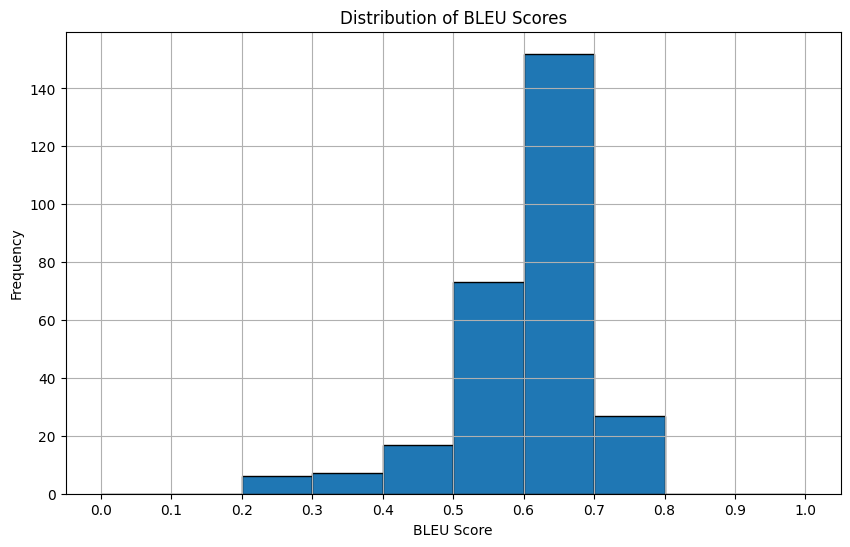

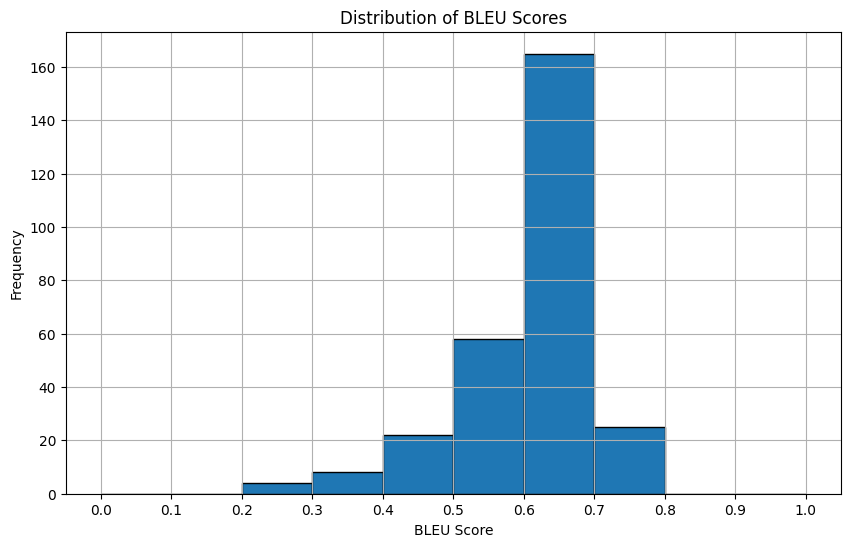

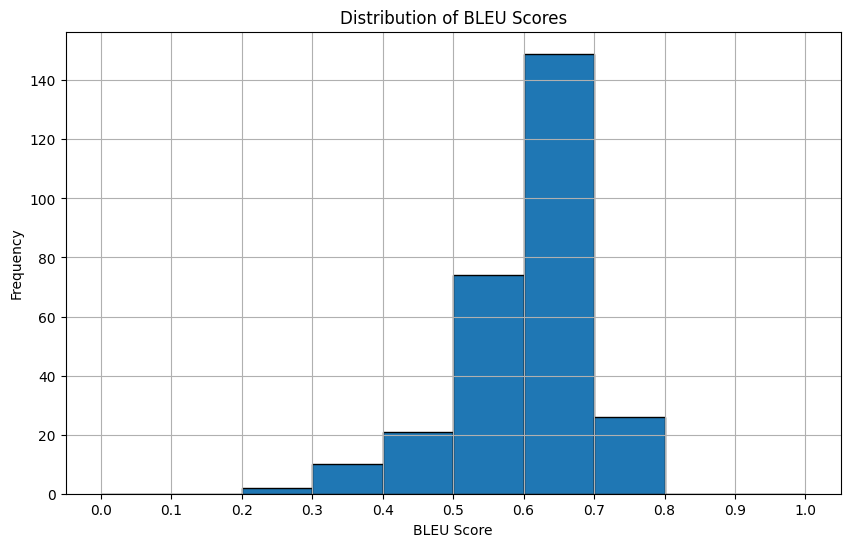

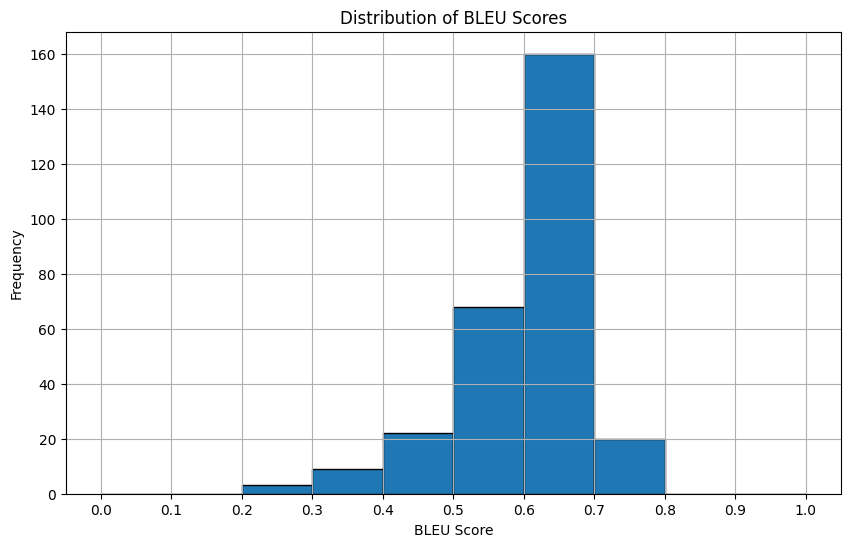

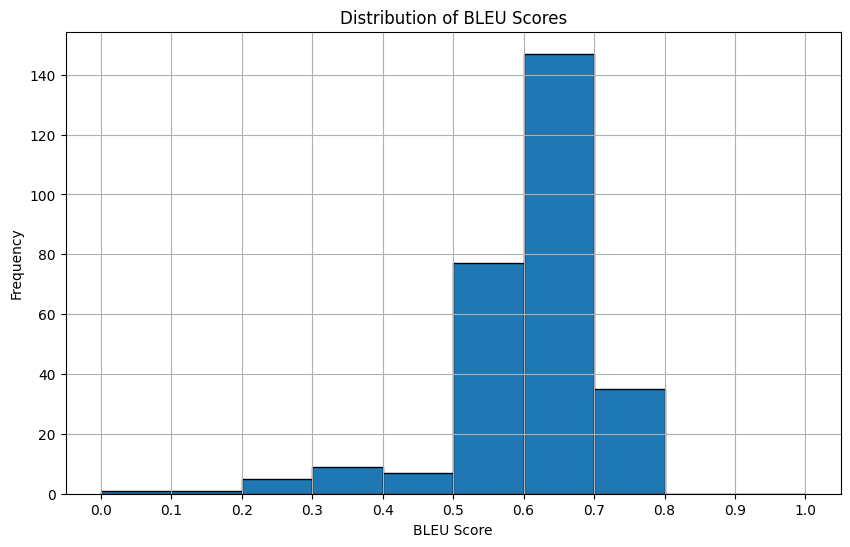

In [42]:
# 4. Plot distribution of scores

def read_bleu_scores(file_path):
    scores = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            scores.append(data['score'])
    return scores

def plot_bleu_distribution(scores, trial, num_bins=10):
    plt.figure(figsize=(10, 6))
    
    # Compute histogram
    counts, bins = np.histogram(scores, bins=num_bins, range=(0, 1))
    
    # Plot histogram as bar chart
    plt.bar(bins[:-1], counts, width=(bins[1] - bins[0]), edgecolor='black', align='edge')

    # add a grid on image
    plt.grid(True)

    # Set titles and labels
    plt.title('Distribution of BLEU Scores')
    plt.xlabel('BLEU Score')
    plt.ylabel('Frequency')
    
    plt.xticks(np.linspace(0, 1, num_bins + 1))

    # create a directory
    plots_dir = os.path.join(ROOT_DIR, EXPERIMENT_NAME, "plots")
    os.makedirs(plots_dir, exist_ok=True)

    # save the file
    plt.savefig(os.path.join(plots_dir, f"bleu_distribution_trial_{trial}.png"))
    
    # Show plot
    plt.show()

if __name__ == "__main__":

    for i in range(NUM_TRIALS):
    
        # Path to the .jsonl file containing BLEU scores
        bleu_scores_file = os.path.join(ROOT_DIR, EXPERIMENT_NAME, "scores", f"bleu_scores_trial_{i}.jsonl")
        
        # Read BLEU scores from the file
        bleu_scores = read_bleu_scores(bleu_scores_file)
        
        # Plot the distribution of BLEU scores
        plot_bleu_distribution(bleu_scores, i)